In [106]:
import pandas as pd

df = pd.read_csv("data/data_cleaned.csv")
df

,Title
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데 빵이나 케이크 구울수 있나요 광파오븐은 첨이라 간단한거 몇개 해보긴했는데
1,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서 광파오븐을 추천하더라구요 왜 그렇게 추천하는지 찾아봤는데 이
2,월에 캐나다로 갈 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어프라이어 등 기능이 많아서 좋긴한데 캐나다 전압이 달라서 가져가면
3,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지 회전함 아파트 옵션 이 있는데 에어프라이어 오븐은 예전부터 쓰던거라 괜찮은데 이사 오면서 쓸 수 있게 된
4,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고기 구이 치킨튀기기 고구마 굽기 계란찜 정도 쓸 것 같고 쿠키만들기도
...,...
9869,평 광파오븐 이건 조합원만 주나요 지인이 평 일반분양걸로 계약했다는데 물어보네요 기본제공품목에는 없는데 혹 일반분양자분들중 내부에 직접 들어가서확인하신분 없는지요 분양사무실에 전화도 안받는다고 좀 물어봐달라네요 아시는분 계신지요
9870,안녕하십니까 늘 새로운 정보를 가지고오는 전자 구미형곡점 김경민팀장입니다 오늘은 많은 분들이 관심을 가지지만 생각보다 비싸서 망설여지는 제품 광파오븐이 전시특가로 판매가능 하여 글을 올립니다 모델인데요 전시 모델이라함은 매장에 전시되어있는 제품을 판매하는것이 기본인데 위의
9871,매립된 광파오븐 사용하고 계신가요 전자렌지 돌리면 원래 안에 불없이 돌아가나요 보통 전자렌지 빨간 불 켜지고 돌아 갔던 것 같은데 이건 불이 안들어오네요 우리집만 구럴까요
9872,고민고민하다 세탁실선반에 광파오븐뒀는데 제가 키가작아서 좀불편하기도하고 혹시 부서질까걱정도되여 혹시 저처럼 놓으신분계실까해서여 안부서질겠쪄


In [107]:
import pandas as pd
from konlpy.tag import Okt

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import matplotlib.font_manager as fm

In [108]:
# 형태소 분석기 초기화
okt = Okt()

In [109]:
stopwords_df = pd.read_csv('../ko-stopwords.csv')
stopwords = list(stopwords_df['stopwords'])
stopwords

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [110]:
#원하는 태그 추출 & 불용어 제거

def okt_pos_tagging(string):  # 사용자 정의 함수, 매개변수 = String
    pos_words = okt.pos(string, stem=True, norm=True)  # pos 함수 : 형태소를 쪼개면서 동시에 품사를 알려준다.

    tagged_list = []
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective', 'Verb']:
            if word not in stopwords:
                if len(word) > 1:
                    if word not in [
                        "광파오븐", "오븐", "광파", "에어", "오브", "프라이어", "컬렉션", "전자", "전자레인지", "레인지",
                        "전자렌지", "엘지", "삼성", "디오스", "프라이", "되어다", "카밍", "에센스", "프라", "아주",
                        "제품원래", "나다", "이기", "에프", "전자", "베이지", "화이트", "냉장고", "식기세척기", "에어컨",
                        "인덕션", "한번", "정도", "유무", "청소기", "진짜", "가장", "김치냉장고", "좋다디자인", "공기청정기",
                        "제품원래", "인버터", "롯데", "밥솥", "싶다", "본점", "받다", "안녕하다", "보다", "써다", "유무",
                        "먹다", "상세", "쓰다", "만들다", "현대", "좋다다양하다", "좋다좋다", "전기레인지", "하이마트",
                        "좋다이벤트", "후기", "구매", "제품", "가전", "상품", "보다", "냉장고", "받다", "방문", "배송",
                        "정보", "베스트", "베이지", "정수기", "식기세척기", "청소기", "확인", "스타", "인덕션", "해보다",
                        "에어컨", "로켓", "타워", "싶다", "세탁기", "오늘", "핫딜", "화이트", "김치냉장고", "정말",
                        "만원", "써다", "한번", "가지", "처음", "로봇청소기", "티비", "밥솥", "에프", "전기포트",
                        "믹서기", "식기건조기", "오븐", "전기그릴", "커피머신", "온풍기", "청소기", "가스레인지",
                        "전기밥솥", "제습기", "선풍기", "히터", "스팀청소기", "전기난로", "냉동고", "가전제품", "다리미", "보온밥솥", "스탠바이", "건조기", "매직",
                        "원래", "육식", "육식맨", "미스트", "아마", "기세", "블랙", "은지", "자꾸", "해주시", "비도", "전이", "해먹", "대다", "렌지",
                        "다가"
                    ]:
                        tagged_list.append(word)
    if len(tagged_list) == 0:
        tagged_list.append("None")
    return tagged_list

In [111]:
#원하는 태그 추출 & 불용어 제거
# Hannanum 객체 생성
from konlpy.tag import Hannanum

hannanum = Hannanum()
def hannanum_pos_tagging(string):  
    pos_words = hannanum.pos(string)  # 'stem' 및 'norm' 인자 없이 호출

    tagged_list = []
    for word, tag in pos_words:
        # Noun(명사), Adjective(형용사), Verb(동사)만 추출
        if tag in ['N', 'P', 'M']:  
            if word not in stopwords:  # 불용어 제거
                if len(word) > 1:  # 한 글자 단어 제외
                    if word not in [  # 추가 불용어 리스트
                        "광파오븐", "오븐", "광파", "에어", "오브", "프라이어", "컬렉션", "전자", "전자레인지", 
                        "레인지", "전자렌지", "엘지", "삼성", "디오스", "프라이", "되어다", "카밍", "에센스", 
                        "프라", "아주", "제품원래", "나다", "이기", "에프", "베이지", "화이트", "냉장고", 
                        "식기세척기", "에어컨", "인덕션", "한번", "정도", "유무", "청소기", "진짜", "가장", 
                        "김치냉장고", "좋다디자인", "공기청정기", "제품원래", "인버터", "롯데", "밥솥", "싶다", 
                        "본점", "받다", "안녕하다", "보다", "써다", "유무", "먹다", "상세", "쓰다", "만들다", 
                        "현대", "좋다다양하다", "좋다좋다", "전기레인지", "하이마트", "좋다이벤트", "후기", 
                        "구매", "제품", "가전", "상품", "보다", "냉장고", "받다", "방문", "배송", "정보", 
                        "베스트", "베이지", "정수기", "식기세척기", "청소기", "확인", "스타", "인덕션", 
                        "해보다", "에어컨", "로켓", "타워", "싶다", "세탁기", "오늘", "핫딜", "화이트", 
                        "김치냉장고", "정말", "만원", "써다", "한번", "가지", "처음", "로봇청소기", "티비", 
                        "밥솥", "에프", "전기포트", "믹서기", "식기건조기", "오븐", "전기그릴", "커피머신", 
                        "온풍기", "청소기", "가스레인지", "전기밥솥", "제습기", "선풍기", "히터", "스팀청소기", 
                        "전기난로", "냉동고", "가전제품", "다리미", "보온밥솥", "스탠바이", "건조기", "매직", 
                        "원래", "육식", "육식맨", "미스트", "아마", "기세", "블랙", "은지", "자꾸", "해주시", 
                        "비도", "전이", "해먹", "대다", "렌지", "다가"
                    ]:
                        tagged_list.append(word)
    if len(tagged_list) == 0:
        tagged_list.append("None")
    return tagged_list

In [112]:
from konlpy.tag import Kkma

# Kkma 형태소 분석기 객체 생성
kkma = Kkma()

# 불용어 리스트 (외부에서 미리 정의된 것으로 가정)
stopwords = [...]  # 불용어 리스트를 정의해 주세요.

def kkma_pos_tagging(string):
    # 형태소 분석 및 품사 태깅
    pos_words = kkma.pos(string)

    tagged_list = []
    for word, tag in pos_words:
        # Noun(명사), Adjective(형용사), Verb(동사)만 추출
        if tag in ['NNG', 'NNP', 'NNB', 'NNM', 'VA', 'VV', 'VX']:  # Kkma의 품사 태그에 맞춰서
            if word not in stopwords:  # 불용어 제거
                if len(word) > 1:  # 한 글자 단어 제외
                    # 추가 불용어 리스트
                    if word not in [
                        "광파오븐", "오븐", "광파", "에어", "오브", "프라이어", "컬렉션", "전자", "전자레인지", 
                        "레인지", "전자렌지", "엘지", "삼성", "디오스", "프라이", "되어다", "카밍", "에센스", 
                        "프라", "아주", "제품원래", "나다", "이기", "에프", "베이지", "화이트", "냉장고", 
                        "식기세척기", "에어컨", "인덕션", "한번", "정도", "유무", "청소기", "진짜", "가장", 
                        "김치냉장고", "좋다디자인", "공기청정기", "제품원래", "인버터", "롯데", "밥솥", "싶다", 
                        "본점", "받다", "안녕하다", "보다", "써다", "유무", "먹다", "상세", "쓰다", "만들다", 
                        "현대", "좋다다양하다", "좋다좋다", "전기레인지", "하이마트", "좋다이벤트", "후기", 
                        "구매", "제품", "가전", "상품", "보다", "냉장고", "받다", "방문", "배송", "정보", 
                        "베스트", "베이지", "정수기", "식기세척기", "청소기", "확인", "스타", "인덕션", 
                        "해보다", "에어컨", "로켓", "타워", "싶다", "세탁기", "오늘", "핫딜", "화이트", 
                        "김치냉장고", "정말", "만원", "써다", "한번", "가지", "처음", "로봇청소기", "티비", 
                        "밥솥", "에프", "전기포트", "믹서기", "식기건조기", "오븐", "전기그릴", "커피머신", 
                        "온풍기", "청소기", "가스레인지", "전기밥솥", "제습기", "선풍기", "히터", "스팀청소기", 
                        "전기난로", "냉동고", "가전제품", "다리미", "보온밥솥", "스탠바이", "건조기", "매직", 
                        "원래", "육식", "육식맨", "미스트", "아마", "기세", "블랙", "은지", "자꾸", "해주시", 
                        "비도", "전이", "해먹", "대다", "렌지", "다가"
                    ]:
                        tagged_list.append(word)

    if len(tagged_list) == 0:
        tagged_list.append("None")
    return tagged_list

In [113]:
#형태소 분리 및 df 적용
tagged_review = []
for review in tqdm(df.Title):
    tagged = kkma_pos_tagging(review)
    tagged_review.append(tagged)
df['tagged_review'] = tagged_review
df = df[~df['tagged_review'].apply(lambda x: "None" in x)]
df

100%|██████████| 9874/9874 [08:04<00:00, 20.37it/s] 


,Title,tagged_review
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데 빵이나 케이크 구울수 있나요 광파오븐은 첨이라 간단한거 몇개 해보긴했는데,"[예전, 가스, 사용하, 이사, 전기, 설치, 케이크, 해보]"
1,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서 광파오븐을 추천하더라구요 왜 그렇게 추천하는지 찾아봤는데 이,"[안녕, 찾아보, 주위, 추천, 그렇, 추천, 찾아보]"
2,월에 캐나다로 갈 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어프라이어 등 기능이 많아서 좋긴한데 캐나다 전압이 달라서 가져가면,"[캐나다, 예정, 기능, 한데, 캐나다, 전압, 다르, 가져가]"
3,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지 회전함 아파트 옵션 이 있는데 에어프라이어 오븐은 예전부터 쓰던거라 괜찮은데 이사 오면서 쓸 수 있게 된,"[전함, 아파트, 옵션, 예전, 괜찮, 이사]"
4,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고기 구이 치킨튀기기 고구마 굽기 계란찜 정도 쓸 것 같고 쿠키만들기도,"[통합, 헷갈리, 돌리, 생선, 구이, 고기, 구이, 치킨, 튀기, 고구마, 계란찜, 쿠키, 만들기]"
...,...,...
9869,평 광파오븐 이건 조합원만 주나요 지인이 평 일반분양걸로 계약했다는데 물어보네요 기본제공품목에는 없는데 혹 일반분양자분들중 내부에 직접 들어가서확인하신분 없는지요 분양사무실에 전화도 안받는다고 좀 물어봐달라네요 아시는분 계신지요,"[조합원, 지인, 일반, 분양, 계약, 물어보, 기본, 제공, 품목, 일반, 분양, 자불, 내부, 들어가, 분양, 사무실, 전화, 안받, 물어보, 달라, 계시]"
9870,안녕하십니까 늘 새로운 정보를 가지고오는 전자 구미형곡점 김경민팀장입니다 오늘은 많은 분들이 관심을 가지지만 생각보다 비싸서 망설여지는 제품 광파오븐이 전시특가로 판매가능 하여 글을 올립니다 모델인데요 전시 모델이라함은 매장에 전시되어있는 제품을 판매하는것이 기본인데 위의,"[안녕, 새롭, 구미, 팀장, 관심, 생각, 비싸, 망설이, 전시, 특가, 판매, 가능, 올리, 모델, 전시, 모델, 매장, 전시, 판매, 기본, 위의]"
9871,매립된 광파오븐 사용하고 계신가요 전자렌지 돌리면 원래 안에 불없이 돌아가나요 보통 전자렌지 빨간 불 켜지고 돌아 갔던 것 같은데 이건 불이 안들어오네요 우리집만 구럴까요,"[매립, 사용, 계신, 가요, 돌리, 돌아가, 보통, 빨갛, 켜지, 불이, 들어오]"
9872,고민고민하다 세탁실선반에 광파오븐뒀는데 제가 키가작아서 좀불편하기도하고 혹시 부서질까걱정도되여 혹시 저처럼 놓으신분계실까해서여 안부서질겠쪄,"[고민, 고민, 하다, 세탁실, 선반, 제가, 불편, 부서지, 걱정, 계시, 부서]"


In [13]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

In [14]:
tagged_corpus_list = []

for i, token in enumerate(df.tagged_review):
    tag = "document {}".format(i)
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words=token))
print('문서의 수 :', len(tagged_corpus_list))

문서의 수 : 9839


In [15]:
model = doc2vec.Doc2Vec(vector_size=100, alpha=0.025, min_alpha=0.025, window=8)
model.build_vocab(tagged_corpus_list)
model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=5)

In [16]:
vector_list = []

for i in tqdm(range(len(df))):
    doc2vec = model.dv["document {}".format(i)]
    vector_list.append(doc2vec)
df['vector'] = vector_list

100%|██████████| 9839/9839 [00:00<00:00, 427791.44it/s]


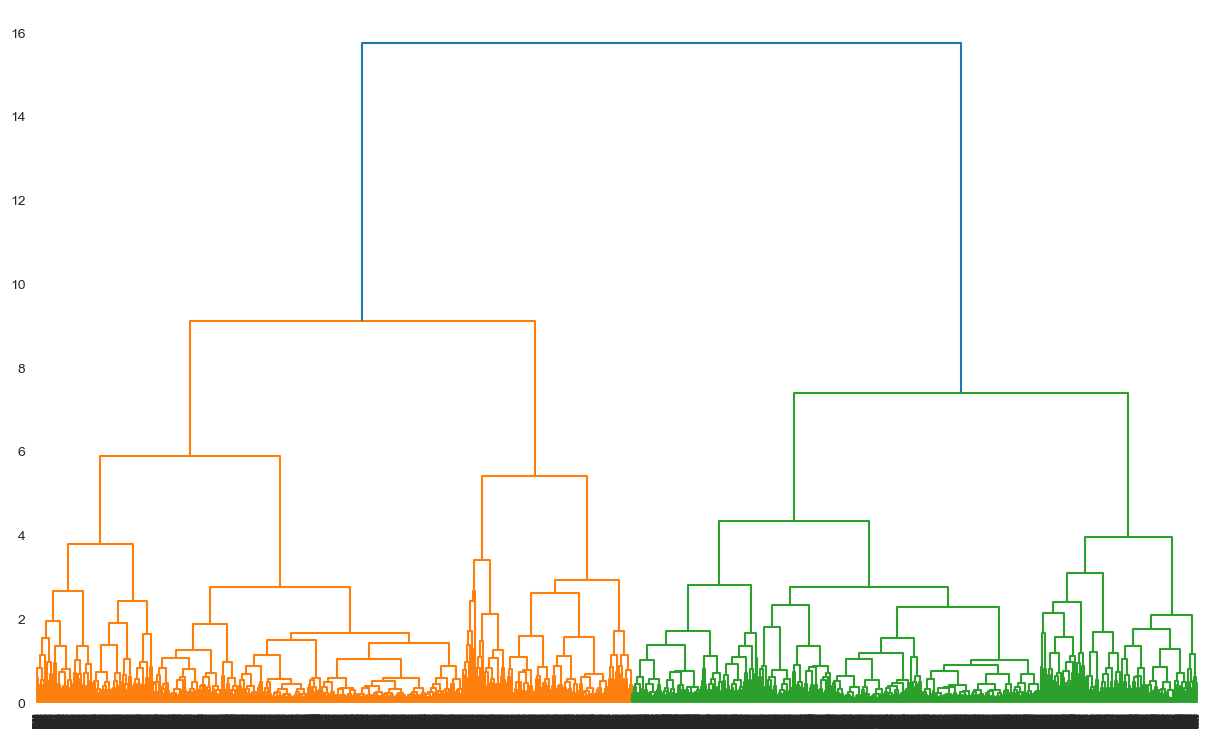

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(list(df['vector']), 'ward')

plt.figure(figsize=(15, 9))  #인치
dendrogram(linked,
           orientation='top',  # 위에서부터 아래로
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

In [18]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = cluster.fit_predict(list(df['vector']))
silhouette_avg = silhouette_score(list(df['vector']), cluster_labels)
silhouette_avg

0.19589403

100%|██████████| 28/28 [02:06<00:00,  4.53s/it]


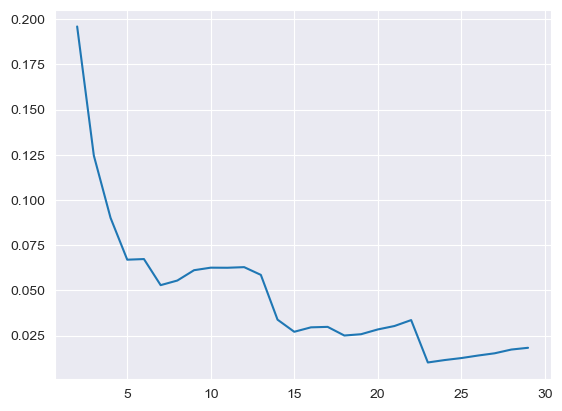

In [19]:
n_clutser = []
clustering_score = []
for i in tqdm(range(2, 30)):  # 군집을 2개부터 29개까지 만들것이다.
    cluster = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = cluster.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_labels)

    n_clutser.append(i)
    clustering_score.append(score)

plt.plot(n_clutser, clustering_score)

In [20]:
result = pd.DataFrame({'n_cluster': n_clutser, 'score': clustering_score})
result

,n_cluster,score
0,2,0.195894
1,3,0.124535
2,4,0.090123
3,5,0.066989
4,6,0.067339
5,7,0.052922
6,8,0.055472
7,9,0.061180
8,10,0.062581
9,11,0.062533


In [21]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = cluster.fit_predict(list(df['vector']))

df['cluster'] = cluster_labels
df.head()

,Title,tagged_review,vector,cluster
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데...,"[예전, 가스, 사용, 해봤다, 이사오, 기광, 설치, 케이크, 구울, 간단하다, 몇개]","[-0.029590491, -0.011117849, -0.035245776, -0....",1
1,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서...,"[사려, 찾아보다, 주위, 추천, 추천, 찾아보다]","[0.0024608227, -0.012064096, -0.014107019, 0.0...",0
2,월에 캐나다로 갈 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어...,"[캐나다, 갈다, 예정, 기능, 많다, 좋다, 기다, 캐나다, 전압, 달라, 가져가다]","[0.007087176, -0.012650851, 0.018207077, 0.006...",0
3,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어...,"[회전, 아파트, 옵션, 예전, 괜찮다, 이사, 오다, 쓸다]","[0.017084965, -0.002115125, 0.0065521756, 0.02...",0
4,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고...,"[통합, 크다, 좋다, 헷갈리다, 햇반, 돌리다, 생선, 구이, 고기, 구이, 치킨...","[0.0106369015, -0.011229154, -0.01627153, -0.0...",0


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

all_document = []
for i in df['cluster'].unique():

    pos_tagged = df[df['cluster'] == i].tagged_review

    cluster_document = ''
    for pos in pos_tagged:
        doc = ' '.join(pos)
        cluster_document += doc

    all_document.append(cluster_document)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_document)
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
tf_idf_df = pd.DataFrame(dense, columns=feature_names)
tf_idf_df_transposed = tf_idf_df.T
tf_idf_df_transposed

,0,1,2
가가,0.003133,0.000328,0.003716
가감,0.000000,0.000556,0.000000
가게,0.001880,0.001314,0.003716
가게매물,0.001061,0.000000,0.000000
가격,0.232502,0.196093,0.076187
...,...,...,...
힘들다아이템,0.001061,0.000000,0.000000
힘들다예쁘다,0.001061,0.000000,0.000000
힘들다유리,0.001061,0.000000,0.000000
힘들엇어,0.000000,0.000556,0.000000


In [23]:
for i in tqdm(tf_idf_df_transposed.columns):
    #tfidf 높은 순부터 정렬하기
    tf_idf_data = tf_idf_df_transposed[i].sort_values(ascending=False)

    # 정렬한 데이터 딕셔너리로 만들기
    data = {'word': tf_idf_data.index, 'tf-idf': tf_idf_data.values}
    data_df = pd.DataFrame(data)

    #딕셔너리로 만든 데이터 df에 자동 저장
    data_df.to_csv('clusters/Cluster{}_tf-idf.csv'.format(i), encoding='utf-8-sig')

100%|██████████| 3/3 [00:00<00:00, 37.02it/s]


# 클러스터 0

In [24]:
df_cluster0 = df[df["cluster"] == 0]
display(df_cluster0)
display(df_cluster0.shape)

,Title,tagged_review,vector,cluster
1,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서...,"[사려, 찾아보다, 주위, 추천, 추천, 찾아보다]","[0.0024608227, -0.012064096, -0.014107019, 0.0...",0
2,월에 캐나다로 갈 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어...,"[캐나다, 갈다, 예정, 기능, 많다, 좋다, 기다, 캐나다, 전압, 달라, 가져가다]","[0.007087176, -0.012650851, 0.018207077, 0.006...",0
3,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어...,"[회전, 아파트, 옵션, 예전, 괜찮다, 이사, 오다, 쓸다]","[0.017084965, -0.002115125, 0.0065521756, 0.02...",0
4,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고...,"[통합, 크다, 좋다, 헷갈리다, 햇반, 돌리다, 생선, 구이, 고기, 구이, 치킨...","[0.0106369015, -0.011229154, -0.01627153, -0.0...",0
5,생선굽거나 닭봉구이 정도 하려면 뭐가 더 나을까요 엘지광파오븐 쿠진아트에어프라이어 ...,"[생선, 굽다, 봉구, 쿠진, 아트, 요즘, 좋다, 많다, 실제, 쓸다, 조언, 부...","[0.016556488, -0.008377614, -0.0065466403, 0.0...",0
...,...,...,...,...
9863,광파오븐렌지대에요 이사오면서 구입해서 실사용 년정도 되고 정말 깨끗한데 다른 가전제...,"[지대, 면서, 구입, 사용, 깨끗하다, 구입, 인하다, 판매, 호구, 관심, 신분...","[-0.0044643446, -0.023026796, -0.024165709, -0...",0
9864,제목이 곧 내용입니다 견적이랑 어떤식으로 되었는지 궁금해서요 미사주방은 광파오븐이랑...,"[제목, 내용, 견적, 궁금하다, 미사, 주방, 넣다, 공간, 없다, 그냥, 올리다...","[0.010165988, -0.02336093, -0.010579087, 0.009...",0
9869,평 광파오븐이건 조합원만 주나요지인이 평 일반분양걸로 계약했다는데 물어보네요 기본제...,"[조합원, 주다, 지인, 분양, 계약, 물어보다, 품목, 없다, 일반, 내부, 직접...","[0.028741235, -0.027455032, -0.0024625864, 0.0...",0
9871,매립된 광파오븐 사용하고 계신가요 전자렌지 돌리면 원래 안에 불없이 돌아가나요 보통...,"[매립, 사용, 계시다, 돌리다, 돌아가다, 보통, 빨갛다, 켜다, 돌다, 가다, ...","[-0.00020925375, -0.019162294, -0.02602467, -0...",0


(4789, 4)

In [25]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

all_docs = list(df_cluster0["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

5795

In [26]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

4789

In [27]:
from gensim.models import CoherenceModel

In [28]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

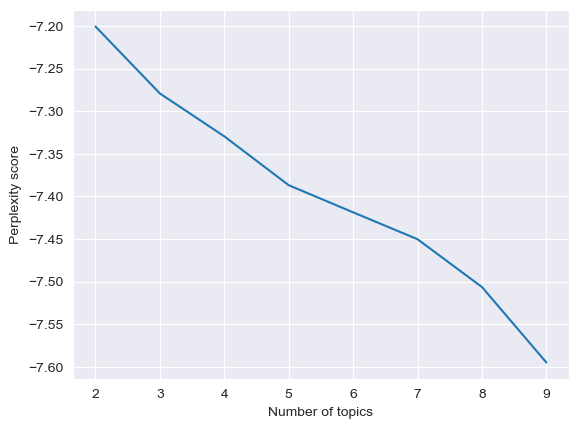

In [29]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [30]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [01:15<00:00,  9.38s/it]


Text(0, 0.5, 'Coherence score')

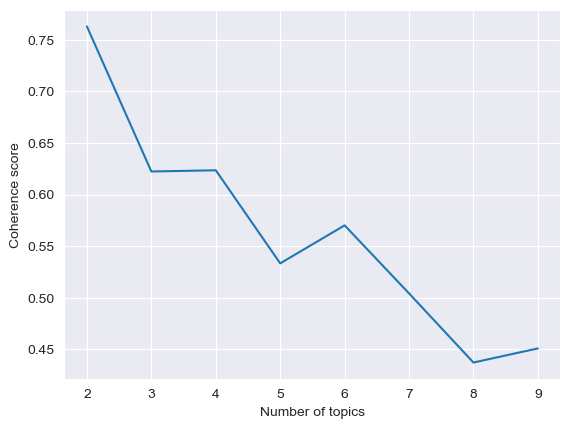

In [31]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [32]:
import numpy as np
from tqdm import tqdm

topic_num = 5
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster0.loc[:, 'action_cluster'] = action_align

df_cluster0


100%|██████████| 4789/4789 [00:00<00:00, 8779.22it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19472\3091771739.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.loc[:, 'action_cluster'] = action_align


,Title,tagged_review,vector,cluster,action_cluster
1,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서...,"[사려, 찾아보다, 주위, 추천, 추천, 찾아보다]","[0.0024608227, -0.012064096, -0.014107019, 0.0...",0,4
2,월에 캐나다로 갈 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어...,"[캐나다, 갈다, 예정, 기능, 많다, 좋다, 기다, 캐나다, 전압, 달라, 가져가다]","[0.007087176, -0.012650851, 0.018207077, 0.006...",0,0
3,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어...,"[회전, 아파트, 옵션, 예전, 괜찮다, 이사, 오다, 쓸다]","[0.017084965, -0.002115125, 0.0065521756, 0.02...",0,1
4,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고...,"[통합, 크다, 좋다, 헷갈리다, 햇반, 돌리다, 생선, 구이, 고기, 구이, 치킨...","[0.0106369015, -0.011229154, -0.01627153, -0.0...",0,4
5,생선굽거나 닭봉구이 정도 하려면 뭐가 더 나을까요 엘지광파오븐 쿠진아트에어프라이어 ...,"[생선, 굽다, 봉구, 쿠진, 아트, 요즘, 좋다, 많다, 실제, 쓸다, 조언, 부...","[0.016556488, -0.008377614, -0.0065466403, 0.0...",0,4
...,...,...,...,...,...
9863,광파오븐렌지대에요 이사오면서 구입해서 실사용 년정도 되고 정말 깨끗한데 다른 가전제...,"[지대, 면서, 구입, 사용, 깨끗하다, 구입, 인하다, 판매, 호구, 관심, 신분...","[-0.0044643446, -0.023026796, -0.024165709, -0...",0,2
9864,제목이 곧 내용입니다 견적이랑 어떤식으로 되었는지 궁금해서요 미사주방은 광파오븐이랑...,"[제목, 내용, 견적, 궁금하다, 미사, 주방, 넣다, 공간, 없다, 그냥, 올리다...","[0.010165988, -0.02336093, -0.010579087, 0.009...",0,3
9869,평 광파오븐이건 조합원만 주나요지인이 평 일반분양걸로 계약했다는데 물어보네요 기본제...,"[조합원, 주다, 지인, 분양, 계약, 물어보다, 품목, 없다, 일반, 내부, 직접...","[0.028741235, -0.027455032, -0.0024625864, 0.0...",0,3
9871,매립된 광파오븐 사용하고 계신가요 전자렌지 돌리면 원래 안에 불없이 돌아가나요 보통...,"[매립, 사용, 계시다, 돌리다, 돌아가다, 보통, 빨갛다, 켜다, 돌다, 가다, ...","[-0.00020925375, -0.019162294, -0.02602467, -0...",0,4


In [33]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/prepared_data_cluster0.html')

In [34]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.057*"기능" + 0.035*"요리" + 0.033*"사용" + 0.024*"좋다" + 0.018*"조리" + 0.017*"다양하다" + 0.014*"디자인" + 0.013*"스팀" + 0.012*"음식" + 0.010*"주방"
Topic ID: 1, Description: 0.039*"사용" + 0.029*"기능" + 0.023*"자다" + 0.013*"구입" + 0.011*"들다" + 0.010*"좋다" + 0.010*"설치" + 0.010*"요리" + 0.008*"주방" + 0.008*"않다"
Topic ID: 2, Description: 0.070*"할인" + 0.054*"가격" + 0.032*"판매" + 0.023*"적용" + 0.009*"작성" + 0.009*"포스팅" + 0.006*"구입" + 0.006*"레시피" + 0.005*"지대" + 0.005*"쿠킹"
Topic ID: 3, Description: 0.046*"좋다" + 0.014*"빌트" + 0.013*"많다" + 0.012*"가격" + 0.009*"생각" + 0.009*"사다" + 0.008*"가성" + 0.008*"설치" + 0.007*"자다" + 0.006*"저렴하다"
Topic ID: 4, Description: 0.020*"리뷰" + 0.016*"추천" + 0.013*"설치" + 0.013*"고구마" + 0.012*"생선" + 0.011*"굽다" + 0.010*"인기" + 0.010*"전기" + 0.010*"구이" + 0.009*"요리"


In [35]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster0.action_cluster):
    if i == 0:
        n = 1
    elif i == 1:
        n = 2
    elif i == 2:
        n = 5
    elif i == 3:
        n = 3
    else:
        n = 4
    new_action_topic.append(n)
df_cluster0.action_cluster = new_action_topic

100%|██████████| 4789/4789 [00:00<00:00, 2389830.08it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19472\766348136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.action_cluster = new_action_topic


# 클러스터 0 결과

In [36]:
df_cluster0

,Title,tagged_review,vector,cluster,action_cluster
1,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서...,"[사려, 찾아보다, 주위, 추천, 추천, 찾아보다]","[0.0024608227, -0.012064096, -0.014107019, 0.0...",0,4
2,월에 캐나다로 갈 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어...,"[캐나다, 갈다, 예정, 기능, 많다, 좋다, 기다, 캐나다, 전압, 달라, 가져가다]","[0.007087176, -0.012650851, 0.018207077, 0.006...",0,1
3,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어...,"[회전, 아파트, 옵션, 예전, 괜찮다, 이사, 오다, 쓸다]","[0.017084965, -0.002115125, 0.0065521756, 0.02...",0,2
4,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고...,"[통합, 크다, 좋다, 헷갈리다, 햇반, 돌리다, 생선, 구이, 고기, 구이, 치킨...","[0.0106369015, -0.011229154, -0.01627153, -0.0...",0,4
5,생선굽거나 닭봉구이 정도 하려면 뭐가 더 나을까요 엘지광파오븐 쿠진아트에어프라이어 ...,"[생선, 굽다, 봉구, 쿠진, 아트, 요즘, 좋다, 많다, 실제, 쓸다, 조언, 부...","[0.016556488, -0.008377614, -0.0065466403, 0.0...",0,4
...,...,...,...,...,...
9863,광파오븐렌지대에요 이사오면서 구입해서 실사용 년정도 되고 정말 깨끗한데 다른 가전제...,"[지대, 면서, 구입, 사용, 깨끗하다, 구입, 인하다, 판매, 호구, 관심, 신분...","[-0.0044643446, -0.023026796, -0.024165709, -0...",0,5
9864,제목이 곧 내용입니다 견적이랑 어떤식으로 되었는지 궁금해서요 미사주방은 광파오븐이랑...,"[제목, 내용, 견적, 궁금하다, 미사, 주방, 넣다, 공간, 없다, 그냥, 올리다...","[0.010165988, -0.02336093, -0.010579087, 0.009...",0,3
9869,평 광파오븐이건 조합원만 주나요지인이 평 일반분양걸로 계약했다는데 물어보네요 기본제...,"[조합원, 주다, 지인, 분양, 계약, 물어보다, 품목, 없다, 일반, 내부, 직접...","[0.028741235, -0.027455032, -0.0024625864, 0.0...",0,3
9871,매립된 광파오븐 사용하고 계신가요 전자렌지 돌리면 원래 안에 불없이 돌아가나요 보통...,"[매립, 사용, 계시다, 돌리다, 돌아가다, 보통, 빨갛다, 켜다, 돌다, 가다, ...","[-0.00020925375, -0.019162294, -0.02602467, -0...",0,4


# 클러스터 1

In [37]:
df_cluster1 = df[df["cluster"] == 1]
display(df_cluster1)
display(df_cluster1.shape)

,Title,tagged_review,vector,cluster
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데...,"[예전, 가스, 사용, 해봤다, 이사오, 기광, 설치, 케이크, 구울, 간단하다, 몇개]","[-0.029590491, -0.011117849, -0.035245776, -0....",1
6,이게 제가 쓰는 엘지 광파오븐입니다 거의 엘지 광파오븐 시조새 모델에 가깝습니다 년...,"[시조새, 모델, 가깝다, 년도, 돼다, 당시, 안되다, 주다]","[-0.02414768, -0.017064225, -0.022372007, -0.0...",1
28,광파오븐빌트인 알뜰하게 먼저 바쁘신 분들을 위해 미리 말씀드리면 광파오븐빌트인 알뜰...,"[빌트, 알뜰하다, 먼저, 바쁘다, 위해, 미리, 말씀드리다, 빌트, 알뜰, 아래,...","[-0.029222809, -0.028991295, -0.030784333, -0....",1
34,특히 매일 요리하는 가스렌지와 제 최애 광파 오븐 청소에는 더더욱 신경을 쓰고 있답...,"[매일, 요리, 가스렌지, 최애, 청소, 더욱, 신경, 주방, 청소, 추천, 가스렌...","[-0.0074129486, -0.005400212, -0.012666653, -0...",1
37,폭 하부장이 광파오븐이랑 사이즈가 딱 입니다 저는 광파오븐 때문에 카페장산거나 마찬...,"[하부, 사이즈, 때문, 카페, 사다, 마찬가지, 사실, 사실, 일반]","[-0.0037769745, -0.012040687, 0.00023396651, 0...",1
...,...,...,...,...
9865,광파오븐이 명에게 통크게 쏩니다경품 받으신분 던킨 오리지널 커피 기콘 되었는데 아직...,"[크게, 쏘다, 경품, 신분, 던킨, 리지, 커피, 기콘, 오다, 발표, 오다, 신...","[-0.024401763, -0.020444542, -0.030136636, -0....",1
9866,한경희 광파오븐 인데여 저번에 회사에서 추석선물로 받았는데 쓸데가 없어서 박스 개봉...,"[한경희, 저번, 회사, 추석, 선물, 쓸다, 없다, 박스, 개봉, 완전, 쎄이, ...","[-0.014222597, -0.011715648, -0.02004668, -0.0...",1
9867,팔아요 디오스 광파오븐 박스 개봉전 물품을 구하고자 하시는 분은 번중 선택해서 입력...,"[파다, 박스, 개봉, 물품, 선택, 입력, 지다, 서울, 송규영, 연락처, 이메일...","[-0.042821165, -0.011526574, -0.05096439, -0.0...",1
9868,할로겐 광파 오븐 실사용 회 사용후 보관 중이던 제품 입니다 아무 이상 없이 작동 ...,"[할로겐, 사용, 사용, 보관, 아무, 작동, 새다, 안양, 직거래, 원하다, 아이...","[-0.026651373, -0.018048592, -0.014332103, -0....",1


(3613, 4)

In [38]:
all_docs = list(df_cluster1["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

5816

In [39]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

3613

In [40]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

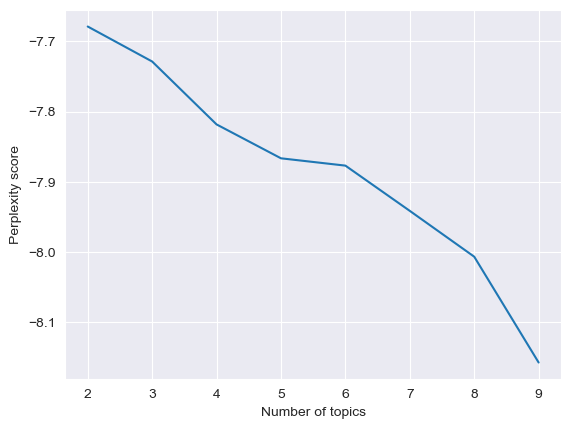

In [41]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [42]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [01:07<00:00,  8.45s/it]


Text(0, 0.5, 'Coherence score')

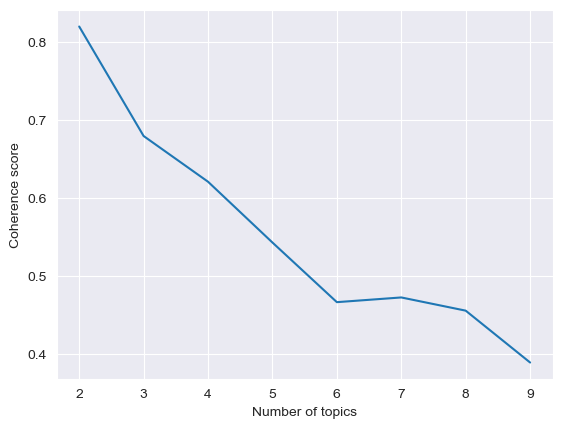

In [43]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [44]:
topic_num = 3
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster1.loc[:, 'action_cluster'] = action_align

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/prepared_data_cluster1.html')

100%|██████████| 3613/3613 [00:00<00:00, 8379.67it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19472\3578888884.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.loc[:, 'action_cluster'] = action_align


In [45]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.034*"기능" + 0.034*"좋다" + 0.014*"사용" + 0.011*"요리" + 0.010*"가격" + 0.010*"다양하다" + 0.009*"디자인" + 0.008*"많다" + 0.008*"조리" + 0.006*"판매"
Topic ID: 1, Description: 0.014*"설치" + 0.014*"가격" + 0.008*"전기" + 0.008*"요리" + 0.008*"주방" + 0.008*"할인" + 0.007*"드리다" + 0.007*"직접" + 0.006*"빠르다" + 0.006*"스마트"
Topic ID: 2, Description: 0.023*"사용" + 0.014*"자다" + 0.011*"좋다" + 0.009*"기능" + 0.008*"않다" + 0.008*"리뷰" + 0.007*"없다" + 0.007*"스팀" + 0.007*"청소" + 0.006*"빌트"


In [46]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster1.action_cluster):
    if i == 0:
        n = 1
    elif i == 1:
        n = 3
    else:
        n = 2
    new_action_topic.append(n)
df_cluster1.action_cluster = new_action_topic

100%|██████████| 3613/3613 [00:00<00:00, 3614123.62it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19472\717649407.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.action_cluster = new_action_topic


# 클러스터 1 결과

In [47]:
df_cluster1

,Title,tagged_review,vector,cluster,action_cluster
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데...,"[예전, 가스, 사용, 해봤다, 이사오, 기광, 설치, 케이크, 구울, 간단하다, 몇개]","[-0.029590491, -0.011117849, -0.035245776, -0....",1,2
6,이게 제가 쓰는 엘지 광파오븐입니다 거의 엘지 광파오븐 시조새 모델에 가깝습니다 년...,"[시조새, 모델, 가깝다, 년도, 돼다, 당시, 안되다, 주다]","[-0.02414768, -0.017064225, -0.022372007, -0.0...",1,1
28,광파오븐빌트인 알뜰하게 먼저 바쁘신 분들을 위해 미리 말씀드리면 광파오븐빌트인 알뜰...,"[빌트, 알뜰하다, 먼저, 바쁘다, 위해, 미리, 말씀드리다, 빌트, 알뜰, 아래,...","[-0.029222809, -0.028991295, -0.030784333, -0....",1,3
34,특히 매일 요리하는 가스렌지와 제 최애 광파 오븐 청소에는 더더욱 신경을 쓰고 있답...,"[매일, 요리, 가스렌지, 최애, 청소, 더욱, 신경, 주방, 청소, 추천, 가스렌...","[-0.0074129486, -0.005400212, -0.012666653, -0...",1,2
37,폭 하부장이 광파오븐이랑 사이즈가 딱 입니다 저는 광파오븐 때문에 카페장산거나 마찬...,"[하부, 사이즈, 때문, 카페, 사다, 마찬가지, 사실, 사실, 일반]","[-0.0037769745, -0.012040687, 0.00023396651, 0...",1,2
...,...,...,...,...,...
9865,광파오븐이 명에게 통크게 쏩니다경품 받으신분 던킨 오리지널 커피 기콘 되었는데 아직...,"[크게, 쏘다, 경품, 신분, 던킨, 리지, 커피, 기콘, 오다, 발표, 오다, 신...","[-0.024401763, -0.020444542, -0.030136636, -0....",1,2
9866,한경희 광파오븐 인데여 저번에 회사에서 추석선물로 받았는데 쓸데가 없어서 박스 개봉...,"[한경희, 저번, 회사, 추석, 선물, 쓸다, 없다, 박스, 개봉, 완전, 쎄이, ...","[-0.014222597, -0.011715648, -0.02004668, -0.0...",1,1
9867,팔아요 디오스 광파오븐 박스 개봉전 물품을 구하고자 하시는 분은 번중 선택해서 입력...,"[파다, 박스, 개봉, 물품, 선택, 입력, 지다, 서울, 송규영, 연락처, 이메일...","[-0.042821165, -0.011526574, -0.05096439, -0.0...",1,1
9868,할로겐 광파 오븐 실사용 회 사용후 보관 중이던 제품 입니다 아무 이상 없이 작동 ...,"[할로겐, 사용, 사용, 보관, 아무, 작동, 새다, 안양, 직거래, 원하다, 아이...","[-0.026651373, -0.018048592, -0.014332103, -0....",1,1


# 클러스터 2

In [48]:
df_cluster2 = df[df["cluster"] == 2]
display(df_cluster2)
display(df_cluster2.shape)

,Title,tagged_review,vector,cluster
7,처음에 입주할때 부터 빌트인 되어있는 광파오븐 사용 중인데요 년이 넘어서 가끔 연기...,"[빌트, 사용, 넘어서다, 가끔, 연기, 불꽃, 튀다, 신청, 두다]","[-0.011726075, -0.010034931, -0.0382909, -0.01...",2
38,저는 신혼가전을 웬만하면 다 로 맞추었어요 베스트샵에서 맞췄는데 광파오븐 신형은 너...,"[신혼, 웬만하다, 맞추다, 맞추다, 신형, 비싸다, 판단, 묶다, 않다, 구형]","[-0.02222384, -0.011145725, -0.02539035, -0.01...",2
77,위와 같은 빌트인제품들은 장에 꽉차게 들어가잖아요 근데 아래제품은 윗면에서 센치 띄...,"[빌트, 꽉차다, 들어가다, 아래, 센치, 띄우다, 덥다, 지금, 빌트, 철거, 새...","[-0.015308873, -0.017294168, -0.025185928, -0....",2
87,엘지광파오븐에어프라이어 핫딜해요 엘지광파오븐에어프라이어 찾아보고 계시죠 아마 이 글...,"[핫딜해, 찾아보다, 계시, 클릭, 보고, 주문, 인기]","[-0.028751478, -0.0033365104, -0.032131877, -0...",2
92,필요한 가전 목록을 정리할때 언급 잠깐 됐다가 바로 지워진 항목 광파오븐 전자레인지...,"[필요하다, 목록, 정리, 언급, 돼다, 지워지다, 항목, 기능, 사용, 남자친구,...","[-0.020524947, -0.012947052, -0.031891827, 0.0...",2
...,...,...,...,...
9851,제품 사양에 조리실 크기가 가로 세로 깊이 라고 되어있는데요 깊이 라는게 조리실 바...,"[사양, 조리, 크기, 가로, 세로, 깊이, 깊이, 조리, 바닥, 세로, 길이, 겠...","[-0.016136862, 0.0014685616, -0.0064814966, -0...",2
9854,원하시는 양식에 필히 기재헤주세요 카페 양식에 맞게 닉네임 변경해주세요 실명전화번호...,"[원하다, 양식, 필히, 기재, 줄다, 카페, 양식, 맞다, 닉네임, 변경, 해주다...","[-0.08448884, -0.010720281, -0.082291685, -0.0...",2
9860,직거래사고시 불이익에 대해서 책임을 지지 않습니다 직거래시 물품 하자 여부를 확인후...,"[직거래, 고시, 불이익, 대해, 책임, 지지, 않다, 직거래, 물품, 하자, 거래...","[-0.060004443, -0.031770065, -0.086084954, -0....",2
9862,서랍장 개 인용 소파 장식장 일체형 컴퓨터 복합기 로봇청소기 무선청소기 선풍기 개 ...,"[서랍, 인용, 소파, 장식, 일체, 컴퓨터, 복합기, 무선, 근적외선, 전기, 일...","[-0.04965426, -0.035818383, -0.051898688, -0.0...",2


(1437, 4)

In [49]:
all_docs = list(df_cluster2["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

5487

In [50]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

1437

In [51]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

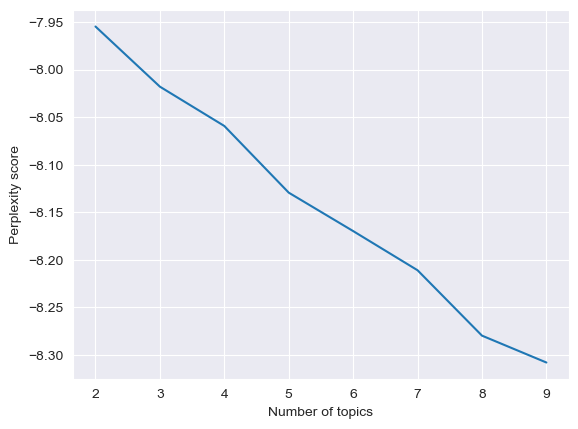

In [52]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [53]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [01:02<00:00,  7.76s/it]


Text(0, 0.5, 'Coherence score')

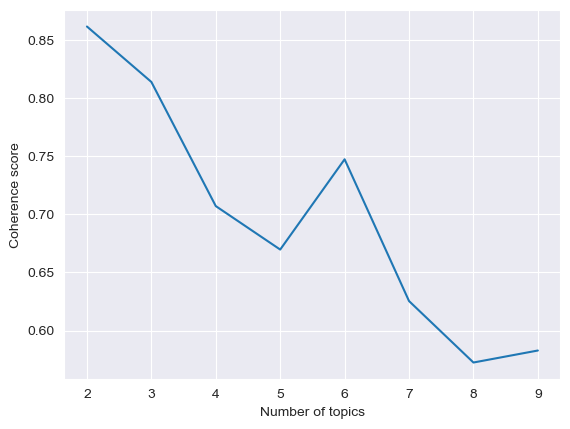

In [54]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [55]:
topic_num = 5
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster2.loc[:, 'action_cluster'] = action_align

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/prepared_data_cluster2.html')

100%|██████████| 1437/1437 [00:00<00:00, 8368.18it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19472\116294067.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster2.loc[:, 'action_cluster'] = action_align


In [56]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.013*"요리" + 0.009*"백화점" + 0.007*"좋다" + 0.006*"빌트" + 0.006*"견적" + 0.006*"가다" + 0.006*"고구마" + 0.005*"기능" + 0.005*"맛있다" + 0.004*"주방"
Topic ID: 1, Description: 0.007*"사용" + 0.007*"요리" + 0.006*"좋다" + 0.006*"기능" + 0.006*"이벤트" + 0.006*"설치" + 0.005*"없다" + 0.004*"많다" + 0.004*"조절" + 0.004*"주방"
Topic ID: 2, Description: 0.015*"좋다" + 0.009*"기능" + 0.009*"없다" + 0.007*"사용" + 0.007*"구입" + 0.007*"이르다" + 0.005*"혼수" + 0.005*"모델" + 0.005*"많다" + 0.005*"크다"
Topic ID: 3, Description: 0.015*"해결" + 0.015*"문제" + 0.012*"리뷰" + 0.011*"고객" + 0.011*"다양하다" + 0.010*"드리다" + 0.009*"그램" + 0.009*"서비스" + 0.009*"인터넷" + 0.008*"익스플로러"
Topic ID: 4, Description: 0.023*"기능" + 0.021*"사용" + 0.016*"좋다" + 0.013*"요리" + 0.009*"자다" + 0.008*"디자인" + 0.007*"이벤트" + 0.007*"조리" + 0.006*"청소" + 0.006*"참여"


In [57]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster2.action_cluster):
    if i == 0:
        n = 3
    elif i == 1:
        n = 4
    elif i == 2:
        n = 2
    elif i == 3:
        n = 5
    else:
        n = 1
    new_action_topic.append(n)
df_cluster2.action_cluster = new_action_topic

100%|██████████| 1437/1437 [00:00<00:00, 1435392.91it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19472\1142497712.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster2.action_cluster = new_action_topic


In [58]:
df_cluster2

,Title,tagged_review,vector,cluster,action_cluster
7,처음에 입주할때 부터 빌트인 되어있는 광파오븐 사용 중인데요 년이 넘어서 가끔 연기...,"[빌트, 사용, 넘어서다, 가끔, 연기, 불꽃, 튀다, 신청, 두다]","[-0.011726075, -0.010034931, -0.0382909, -0.01...",2,3
38,저는 신혼가전을 웬만하면 다 로 맞추었어요 베스트샵에서 맞췄는데 광파오븐 신형은 너...,"[신혼, 웬만하다, 맞추다, 맞추다, 신형, 비싸다, 판단, 묶다, 않다, 구형]","[-0.02222384, -0.011145725, -0.02539035, -0.01...",2,4
77,위와 같은 빌트인제품들은 장에 꽉차게 들어가잖아요 근데 아래제품은 윗면에서 센치 띄...,"[빌트, 꽉차다, 들어가다, 아래, 센치, 띄우다, 덥다, 지금, 빌트, 철거, 새...","[-0.015308873, -0.017294168, -0.025185928, -0....",2,1
87,엘지광파오븐에어프라이어 핫딜해요 엘지광파오븐에어프라이어 찾아보고 계시죠 아마 이 글...,"[핫딜해, 찾아보다, 계시, 클릭, 보고, 주문, 인기]","[-0.028751478, -0.0033365104, -0.032131877, -0...",2,3
92,필요한 가전 목록을 정리할때 언급 잠깐 됐다가 바로 지워진 항목 광파오븐 전자레인지...,"[필요하다, 목록, 정리, 언급, 돼다, 지워지다, 항목, 기능, 사용, 남자친구,...","[-0.020524947, -0.012947052, -0.031891827, 0.0...",2,1
...,...,...,...,...,...
9851,제품 사양에 조리실 크기가 가로 세로 깊이 라고 되어있는데요 깊이 라는게 조리실 바...,"[사양, 조리, 크기, 가로, 세로, 깊이, 깊이, 조리, 바닥, 세로, 길이, 겠...","[-0.016136862, 0.0014685616, -0.0064814966, -0...",2,1
9854,원하시는 양식에 필히 기재헤주세요 카페 양식에 맞게 닉네임 변경해주세요 실명전화번호...,"[원하다, 양식, 필히, 기재, 줄다, 카페, 양식, 맞다, 닉네임, 변경, 해주다...","[-0.08448884, -0.010720281, -0.082291685, -0.0...",2,2
9860,직거래사고시 불이익에 대해서 책임을 지지 않습니다 직거래시 물품 하자 여부를 확인후...,"[직거래, 고시, 불이익, 대해, 책임, 지지, 않다, 직거래, 물품, 하자, 거래...","[-0.060004443, -0.031770065, -0.086084954, -0....",2,3
9862,서랍장 개 인용 소파 장식장 일체형 컴퓨터 복합기 로봇청소기 무선청소기 선풍기 개 ...,"[서랍, 인용, 소파, 장식, 일체, 컴퓨터, 복합기, 무선, 근적외선, 전기, 일...","[-0.04965426, -0.035818383, -0.051898688, -0.0...",2,4


In [81]:
df_cluster0 = df_cluster0[['Title', 'tagged_review','cluster', 'action_cluster']]
df_cluster1 = df_cluster1[['Title', 'tagged_review','cluster', 'action_cluster']]
df_cluster2 = df_cluster2[['Title', 'tagged_review','cluster', 'action_cluster']]
df_combined = pd.concat([df_cluster0, df_cluster1, df_cluster2],
                        ignore_index=True)
df_combined.to_csv("data/클러스터_분석_태그.csv", index=False)

KeyError: "['tagged_review'] not in index"

In [59]:
df_cluster0 = df_cluster0[['Title', 'cluster', 'action_cluster']]
df_cluster1 = df_cluster1[['Title', 'cluster', 'action_cluster']]
df_cluster2 = df_cluster2[['Title', 'cluster', 'action_cluster']]
df_combined = pd.concat([df_cluster0, df_cluster1, df_cluster2],
                        ignore_index=True)
df_combined

,Title,cluster,action_cluster
0,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서...,0,4
1,월에 캐나다로 갈 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어...,0,1
2,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어...,0,2
3,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고...,0,4
4,생선굽거나 닭봉구이 정도 하려면 뭐가 더 나을까요 엘지광파오븐 쿠진아트에어프라이어 ...,0,4
...,...,...,...
9834,제품 사양에 조리실 크기가 가로 세로 깊이 라고 되어있는데요 깊이 라는게 조리실 바...,2,1
9835,원하시는 양식에 필히 기재헤주세요 카페 양식에 맞게 닉네임 변경해주세요 실명전화번호...,2,2
9836,직거래사고시 불이익에 대해서 책임을 지지 않습니다 직거래시 물품 하자 여부를 확인후...,2,3
9837,서랍장 개 인용 소파 장식장 일체형 컴퓨터 복합기 로봇청소기 무선청소기 선풍기 개 ...,2,4


In [60]:
df_combined.to_csv("data/클러스터_분석완료_추가.csv", index=False)

In [61]:
import json

with open('../SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
    senti_dict = json.load(f)
senti_dict

[{'word': '(-;', 'word_root': '(', 'polarity': '1'},
 {'word': '(;_;)', 'word_root': '(;_;)', 'polarity': '-1'},
 {'word': '(^^)', 'word_root': '(^^)', 'polarity': '1'},
 {'word': '(^-^)', 'word_root': '(^-^)', 'polarity': '1'},
 {'word': '(^^*', 'word_root': '(', 'polarity': '1'},
 {'word': '(^_^)', 'word_root': '(^_^)', 'polarity': '1'},
 {'word': '(^_^;', 'word_root': '(', 'polarity': '-1'},
 {'word': '(^o^)', 'word_root': '(^o^)', 'polarity': '1'},
 {'word': '(-_-)', 'word_root': '(-_-)', 'polarity': '-1'},
 {'word': '(T_T)', 'word_root': '(T_T)', 'polarity': '-1'},
 {'word': '(ㅡㅡ)', 'word_root': '(', 'polarity': '-1'},
 {'word': ')-:', 'word_root': ')', 'polarity': '-1'},
 {'word': '*^^*', 'word_root': '*', 'polarity': '1'},
 {'word': '/^o^\\', 'word_root': '/', 'polarity': '1'},
 {'word': ':(', 'word_root': ':', 'polarity': '1'},
 {'word': ":'-(", 'word_root': ':', 'polarity': '1'},
 {'word': ':-(', 'word_root': ':', 'polarity': '1'},
 {'word': ':)', 'word_root': ':', 'polarity':

In [62]:
def sentiment_score(sent_dicts, token_list):
    result_list = []
    for token in token_list:
        for dict in sent_dicts:
            if token == dict['word']:
                result = dict['polarity'], dict['word']
                result_list.append(result)
    return result_list

In [63]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)

    tagged_list = []
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective', 'Verb', 'VerbPrefix']:
            tagged_list.append(word)
    return tagged_list

In [64]:
sentiment = []
for i in tqdm(df_combined['Title']):
    token = okt_pos_tagging(i)
    score = sentiment_score(senti_dict, token)
    sentiment.append(score)
sentiment

100%|██████████| 9839/9839 [02:51<00:00, 57.39it/s] 


[[],
 [('2', '많다'), ('2', '좋다')],
 [('1', '괜찮다')],
 [('1', '크다'), ('2', '좋다')],
 [('2', '좋다'), ('2', '많다')],
 [('-1', '소음'), ('-2', '불편하다'), ('1', '기대')],
 [('2', '재미'), ('-2', '비싸다')],
 [],
 [('1', '갖추다'), ('0', '못')],
 [('1', '높다'), ('2', '이쁘다')],
 [('-1', '없다'), ('1', '다양하다'), ('2', '좋다')],
 [],
 [('1', '할인')],
 [],
 [('2', '좋다')],
 [('2', '좋다'), ('-2', '해')],
 [('2', '좋다'), ('2', '깔끔하다'), ('1', '다양하다')],
 [('2', '많다')],
 [('-1', '없다'), ('2', '유용하다'), ('-2', '비싸다')],
 [('1', '필수')],
 [('1', '전문가'), ('1', '다양하다'), ('2', '좋다')],
 [('1', '받다')],
 [('1', '괜찮다')],
 [('2', '좋아지다'), ('2', '많다'), ('2', '좋다')],
 [],
 [('2', '가능하다')],
 [],
 [('1', '괜찮다')],
 [],
 [('1', '받다'), ('1', '크다')],
 [('1', '괜찮다')],
 [],
 [('-1', '지다')],
 [],
 [('1', '괜찮다')],
 [('1', '인기')],
 [('-2', '아니다'), ('1', '받다')],
 [],
 [('1', '괜찮다')],
 [('2', '예쁘다')],
 [('2', '가능하다')],
 [],
 [],
 [('1', '크다'), ('2', '고르다'), ('2', '좋다'), ('2', '고르다'), ('2', '예쁘다')],
 [],
 [('-1', '없다')],
 [('1', '받다'), ('2', '유용하다'), ('2', '만족스

In [65]:
 #감성점수 평균구하기
sentiment_score = []
for sent in tqdm(sentiment):
    score = []
    for s in sent:
        score.append(int(s[0]))

    #감성 점수가 잡히지 않은 리스트는 len이 0
    if len(score) == 0:
        sentiment_score.append(0)
    else:
        sentiment_score.append(np.mean(score))
sentiment_score

100%|██████████| 9839/9839 [00:00<00:00, 223612.88it/s]


[0,
 2.0,
 1.0,
 1.5,
 2.0,
 -0.6666666666666666,
 0.0,
 0,
 0.5,
 1.5,
 0.6666666666666666,
 0,
 1.0,
 0,
 2.0,
 0.0,
 1.6666666666666667,
 2.0,
 -0.3333333333333333,
 1.0,
 1.3333333333333333,
 1.0,
 1.0,
 2.0,
 0,
 2.0,
 0,
 1.0,
 0,
 1.0,
 1.0,
 0,
 -1.0,
 0,
 1.0,
 1.0,
 -0.5,
 0,
 1.0,
 2.0,
 2.0,
 0,
 0,
 1.8,
 0,
 -1.0,
 1.6666666666666667,
 0,
 1.0,
 0.0,
 1.0,
 -0.6666666666666666,
 1.5,
 -1.5,
 0,
 1.0,
 1.0,
 0,
 1.6666666666666667,
 0,
 0.0,
 1.6666666666666667,
 1.0,
 -1.0,
 2.0,
 2.0,
 0.0,
 0.5,
 1.5,
 2.0,
 1.5,
 1.5,
 1.6666666666666667,
 1.5,
 1.5,
 2.0,
 2.0,
 1.5,
 -2.0,
 -2.0,
 1.3333333333333333,
 -0.25,
 1.6666666666666667,
 2.0,
 -1.3333333333333333,
 1.5,
 0.0,
 1.5,
 1.5,
 0,
 2.0,
 0,
 0,
 -1.0,
 0,
 0,
 -0.5,
 0,
 2.0,
 0,
 1.5,
 2.0,
 -2.0,
 2.0,
 1.5,
 0,
 -1.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 0,
 1.0,
 0,
 1.5,
 1.0,
 -1.0,
 1.5,
 -0.5,
 1.0,
 0,
 1.5,
 2.0,
 0.0,
 0,
 0,
 -2.0,
 1.0,
 1.6666666666666667,
 0.6666666666666666,
 2.0,
 1.5,
 -1.0

In [66]:
df_combined['sentiment_score'] = sentiment_score
df_combined.action_cluster.unique()

array([4, 1, 2, 3, 5], dtype=int64)

In [67]:
action_sents = dict()
for actor in df_combined.cluster.unique():
    actor_df = df_combined[df_combined['cluster'] == actor]

    for i in actor_df.action_cluster.unique():
        action_score = actor_df[actor_df['action_cluster'] == i].sentiment_score
        action_score = np.mean(action_score)
        action_sents['Actor{}_Action{}'.format(actor, i)] = action_score
action_sents

{'Actor0_Action4': 0.5993879155435758,
 'Actor0_Action1': 1.0851465604933974,
 'Actor0_Action2': 0.655679695613029,
 'Actor0_Action3': 0.8100225019765248,
 'Actor0_Action5': 0.6982353362714537,
 'Actor1_Action2': 0.5201978104245509,
 'Actor1_Action1': 1.0661623400753835,
 'Actor1_Action3': 0.5965913619156297,
 'Actor2_Action3': 0.5962932384926091,
 'Actor2_Action4': 0.40601419143539696,
 'Actor2_Action1': 0.778858563224341,
 'Actor2_Action5': 0.6369771033564137,
 'Actor2_Action2': 0.5467468221049883}

In [68]:
from sklearn.preprocessing import MinMaxScaler

data = action_sents.values()

data = np.array(list(data)).reshape(-1, 1)
data

array([[0.59938792],
       [1.08514656],
       [0.6556797 ],
       [0.8100225 ],
       [0.69823534],
       [0.52019781],
       [1.06616234],
       [0.59659136],
       [0.59629324],
       [0.40601419],
       [0.77885856],
       [0.6369771 ],
       [0.54674682]])

In [69]:
scaler = MinMaxScaler(feature_range=(-10, 10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[ -4.30527146],
       [ 10.        ],
       [ -2.6475157 ],
       [  1.89777808],
       [ -1.39428017],
       [ -6.63736779],
       [  9.44092724],
       [ -4.38762812],
       [ -4.39640766],
       [-10.        ],
       [  0.98002065],
       [ -3.19829469],
       [ -5.85551692]])

In [70]:
sents_df = pd.DataFrame(action_sents.keys(), columns=['Action'])
sents_df['satisfaction'] = transformed_data
sents_df

,Action,satisfaction
0,Actor0_Action4,-4.305271
1,Actor0_Action1,10.000000
2,Actor0_Action2,-2.647516
3,Actor0_Action3,1.897778
4,Actor0_Action5,-1.394280
5,Actor1_Action2,-6.637368
6,Actor1_Action1,9.440927
7,Actor1_Action3,-4.387628
8,Actor2_Action3,-4.396408
9,Actor2_Action4,-10.000000


In [71]:
from collections import Counter

importance_check = []
for actor, action in zip(df_combined['cluster'], df_combined['action_cluster']):
    importance_check.append('Actor' + str(actor) + '_' + 'Action' + str(action))
importance_check

['Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action4',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action4',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Act

In [72]:
freq = Counter(importance_check)
freq

Counter({'Actor0_Action1': 1802,
         'Actor1_Action1': 1426,
         'Actor1_Action2': 1231,
         'Actor0_Action2': 1125,
         'Actor1_Action3': 956,
         'Actor0_Action3': 783,
         'Actor0_Action4': 636,
         'Actor0_Action5': 443,
         'Actor2_Action2': 349,
         'Actor2_Action1': 342,
         'Actor2_Action3': 271,
         'Actor2_Action4': 243,
         'Actor2_Action5': 232})

In [73]:
importance_dict = dict()

total_count = len(importance_check)
for item, value in freq.items():
    importance = (value / total_count) * 100
    importance_dict[item] = importance
importance_dict

{'Actor0_Action4': 6.464071551986991,
 'Actor0_Action1': 18.314869397296473,
 'Actor0_Action2': 11.434088830165667,
 'Actor0_Action3': 7.958125825795305,
 'Actor0_Action5': 4.502490090456347,
 'Actor1_Action2': 12.511434088830164,
 'Actor1_Action1': 14.493342819392216,
 'Actor1_Action3': 9.716434597011892,
 'Actor2_Action3': 2.754344953755463,
 'Actor2_Action4': 2.469763187315784,
 'Actor2_Action1': 3.475963004370363,
 'Actor2_Action5': 2.3579632076430532,
 'Actor2_Action2': 3.5471084459802826}

In [74]:
data = importance_dict.values()

data = np.array(list(data)).reshape(-1, 1)
data

array([[ 6.46407155],
       [18.3148694 ],
       [11.43408883],
       [ 7.95812583],
       [ 4.50249009],
       [12.51143409],
       [14.49334282],
       [ 9.7164346 ],
       [ 2.75434495],
       [ 2.46976319],
       [ 3.475963  ],
       [ 2.35796321],
       [ 3.54710845]])

In [75]:
scaler = MinMaxScaler(feature_range=(0, 10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[ 2.57324841],
       [10.        ],
       [ 5.68789809],
       [ 3.50955414],
       [ 1.34394904],
       [ 6.36305732],
       [ 7.60509554],
       [ 4.61146497],
       [ 0.24840764],
       [ 0.07006369],
       [ 0.70063694],
       [ 0.        ],
       [ 0.74522293]])

In [76]:
sents_df['importance'] = transformed_data
sents_df

,Action,satisfaction,importance
0,Actor0_Action4,-4.305271,2.573248
1,Actor0_Action1,10.000000,10.000000
2,Actor0_Action2,-2.647516,5.687898
3,Actor0_Action3,1.897778,3.509554
4,Actor0_Action5,-1.394280,1.343949
5,Actor1_Action2,-6.637368,6.363057
6,Actor1_Action1,9.440927,7.605096
7,Actor1_Action3,-4.387628,4.611465
8,Actor2_Action3,-4.396408,0.248408
9,Actor2_Action4,-10.000000,0.070064


In [77]:
def Opportunity_score(satisfaction, importance):
    return importance + max(0, satisfaction - importance)

In [78]:
opportunity_list = []
for s, i in zip(sents_df['satisfaction'], sents_df['importance']):
    score_result = Opportunity_score(s, i)
    opportunity_list.append(score_result)
sents_df['opportunity'] = opportunity_list
sents_df.to_csv('data/opportunity_score_df.csv', index=False)
sents_df

,Action,satisfaction,importance,opportunity
0,Actor0_Action4,-4.305271,2.573248,2.573248
1,Actor0_Action1,10.000000,10.000000,10.000000
2,Actor0_Action2,-2.647516,5.687898,5.687898
3,Actor0_Action3,1.897778,3.509554,3.509554
4,Actor0_Action5,-1.394280,1.343949,1.343949
5,Actor1_Action2,-6.637368,6.363057,6.363057
6,Actor1_Action1,9.440927,7.605096,9.440927
7,Actor1_Action3,-4.387628,4.611465,4.611465
8,Actor2_Action3,-4.396408,0.248408,0.248408
9,Actor2_Action4,-10.000000,0.070064,0.070064


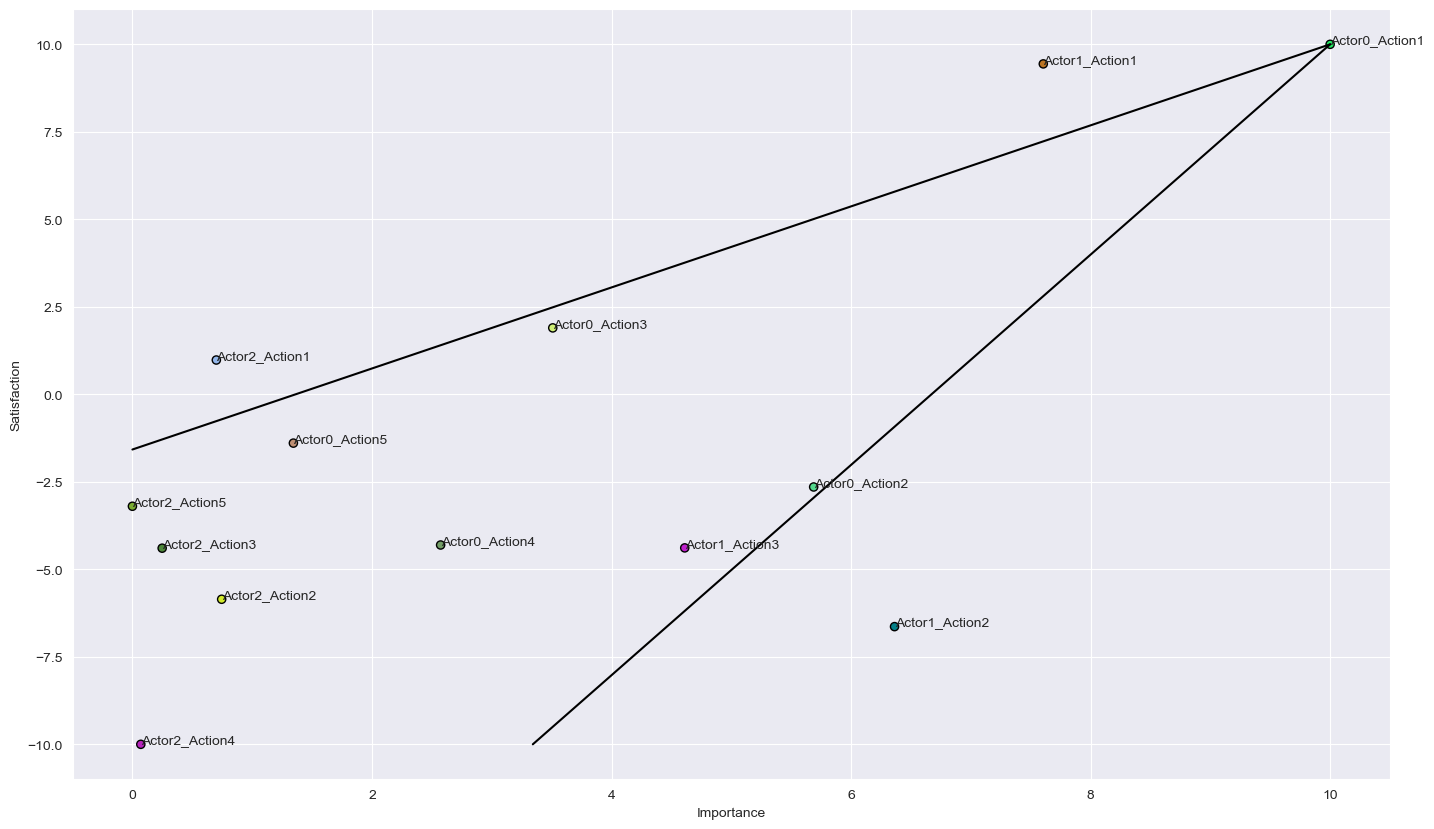

In [79]:
colors = np.random.rand(len(sents_df.Action), 3)
satisfaction = sents_df.satisfaction
importance = sents_df.importance
actions = sents_df.Action
plt.figure(figsize=(17, 10))
plt.scatter(importance, satisfaction, s=35, c=colors, edgecolors='black')  #s는 점의 사이

xdata = [0, 10]
ydata = [satisfaction.mean(), 10]
plt.plot(xdata, ydata, 'k')

plt.xlabel('Importance')
plt.ylabel('Satisfaction')

x_data = [importance.mean(), 10]
y_data = [-10, 10]
plt.plot(x_data, y_data, 'k')

for i, action in enumerate(actions):
    plt.text(importance[i], satisfaction[i], action, fontsize=10)

plt.savefig('data/opportunity_area.png')

In [80]:
df_combined

,Title,cluster,action_cluster,sentiment_score
0,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서 광파오븐을 추천하더라구요 왜 그렇게 추천하는지 찾아봤는데 이,0,4,0.000000
1,월에 캐나다로 갈 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어프라이어 등 기능이 많아서 좋긴한데 캐나다 전압이 달라서 가져가면,0,1,2.000000
2,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어프라이어 오븐은 예전부터 쓰던거라 괜찮은데 이사 오면서 쓸 수 있게 된,0,2,1.000000
3,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고기 구이 치킨튀기기 고구마 굽기 계란찜 정도 쓸 것 같고 쿠키만들기도,0,4,1.500000
4,생선굽거나 닭봉구이 정도 하려면 뭐가 더 나을까요 엘지광파오븐 쿠진아트에어프라이어 요즘 좋은 제품 많던데 실제 쓰신 분들 조언 부탁드려요,0,4,2.000000
...,...,...,...,...
9834,제품 사양에 조리실 크기가 가로 세로 깊이 라고 되어있는데요 깊이 라는게 조리실 바닥의 세로길이겠죠 이케아 오븐트레이 살려하는데 크기가 맞을려나 싶어서요,2,1,0.000000
9835,원하시는 양식에 필히 기재헤주세요 카페 양식에 맞게 닉네임 변경해주세요 실명전화번호 강대성 판매 양식 필수물품명 광파오븐 필수수량 개 필수구입시기사용기간횟수 달회 필수물건상태정보 완젼 새거 필수거래방법택배,2,2,0.833333
9836,직거래사고시 불이익에 대해서 책임을 지지 않습니다 직거래시 물품 하자 여부를 확인후 거래하시기 바랍니다 직거래 양식 물품종류 한경희 광파오븐 구입시기 희망가격 만원조정가능 연 락 처 문자가더좋아요 판매자 위치 은평구신사동 상세 설명 몇번사용안,2,3,0.666667
9837,서랍장 개 인용 소파 장식장 일체형 컴퓨터 복합기 로봇청소기 무선청소기 선풍기 개 근적외선 전기히터 개 냉장고 전기밥솥 광파오븐 정수기 일체형 세탁기건조기 식탁 식탁의자 개 교자상 펜트리 곳 보관된 짐액자 수납통들 및 캠핑용품 등 부엌 집기류 화장실 곳 용품,2,4,-1.000000


In [168]:
df_result = df_combined[(df_combined['action_cluster'] == 2) & (df_combined['cluster'].isin([0, 1, 3]))]
df_result.to_csv('data/result.csv', index=False)